<a href="https://colab.research.google.com/github/Nikhil90398/Regression_Models/blob/main/oceanographic_data_RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context
The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

# Question
CalCOFI data: Over 60 years of oceanographic data: Is there a relationship between given factors & water temperature? Can you predict the water temperature based on given factors?

#Step 1 - Download and Explore the Data
The dataset is available as a ZIP file at the following url:

In [140]:
dataset_url = 'https://www.kaggle.com/datasets/sohier/calcofi'

In [141]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./calcofi" (use force=True to force download)


In [143]:
import os
data_dir='/content/calcofi'
os.listdir(data_dir)

['bottle.csv', 'cast.csv']

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

> **QUESTION 1**: Load the data from the file `bottle.csv` into a Pandas data frame.

In [145]:
path= data_dir +"/bottle.csv"
bottle=pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [146]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#The following settings will improve the default style and font sizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [147]:
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

> **QUESTION 2**: How many `rows` and `columns` does the dataset contain? 

In [149]:
n_rows = bottle.shape[0]
n_cols =bottle.shape[1]
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 864863 rows and 74 columns.


> **(OPTIONAL) QUESTION**: Before training the model, you may want to explore and visualize data from the various columns within the dataset, and study their relationship with Temperature. Create some graphs and summarize your insights using the empty cells below.

In [150]:
## Here we will check the percentage of nan values present in each feature
feature_with_na=[feature for feature in bottle.columns if bottle[feature].isnull().sum()>1]

for feature in feature_with_na:
  print(feature, np.round(bottle[feature].isnull().mean(), 4)*100,  " % missing values")

T_degC 1.27  % missing values
Salnty 5.48  % missing values
O2ml_L 19.5  % missing values
STheta 6.09  % missing values
O2Sat 23.54  % missing values
Oxy_µmol/Kg 23.54  % missing values
BtlNum 86.28  % missing values
T_prec 1.27  % missing values
T_qual 97.33000000000001  % missing values
S_prec 5.48  % missing values
S_qual 91.34  % missing values
P_qual 22.1  % missing values
O_qual 78.64999999999999  % missing values
SThtaq 92.39  % missing values
O2Satq 74.82  % missing values
ChlorA 73.95  % missing values
Chlqua 26.1  % missing values
Phaeop 73.95  % missing values
Phaqua 26.1  % missing values
PO4uM 52.21  % missing values
PO4q 47.760000000000005  % missing values
SiO3uM 59.06  % missing values
SiO3qu 40.93  % missing values
NO2uM 60.97  % missing values
NO2q 38.78  % missing values
NO3uM 60.99  % missing values
NO3q 38.73  % missing values
NH3uM 92.49000000000001  % missing values
NH3q 6.54  % missing values
C14As1 98.33  % missing values
C14A1p 98.52  % missing values
C14A1q 1

In [151]:
#lets drop columns which have nan value above 40%
perc=40.0
min_count=int(((100-perc)/100)*bottle.shape[0] + 1)
bottle=bottle.dropna(axis=1,thresh=min_count)
bottle=bottle.drop(["Depth_ID","Sta_ID"],axis=1)

list of numerical variables

In [152]:
# list of numerical variables
numerical_features = [feature for feature in bottle.columns if bottle[feature].dtypes != "O"]  
print("number of numerical variables: ",len(numerical_features))    
# visualise the numerical columns
bottle[numerical_features].head()

number of numerical variables:  32


,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


In [153]:
## Numerical variables are usually of 2 type
## 1 Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(bottle[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 13


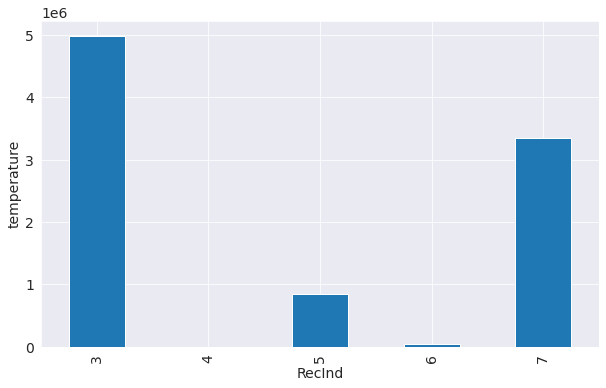

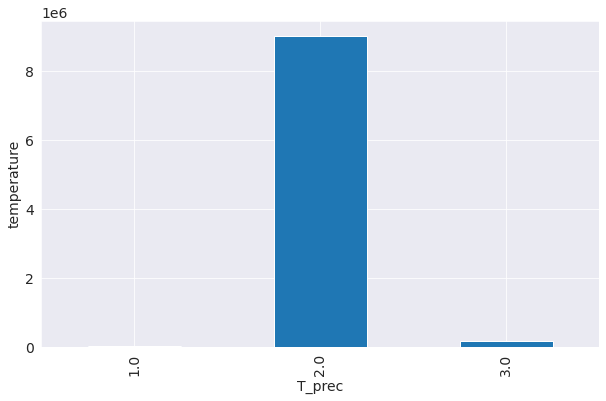

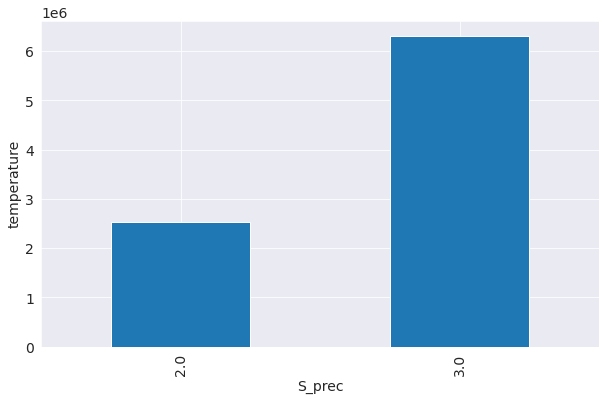

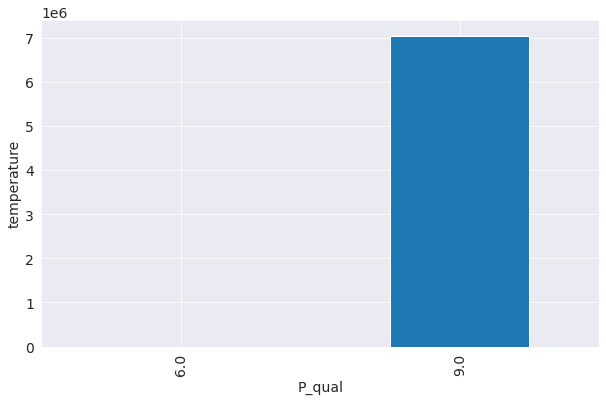

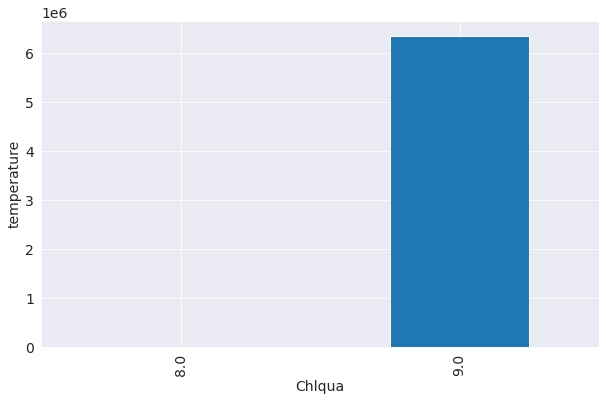

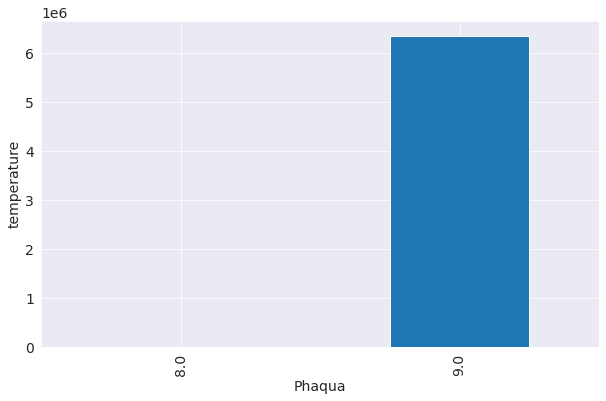

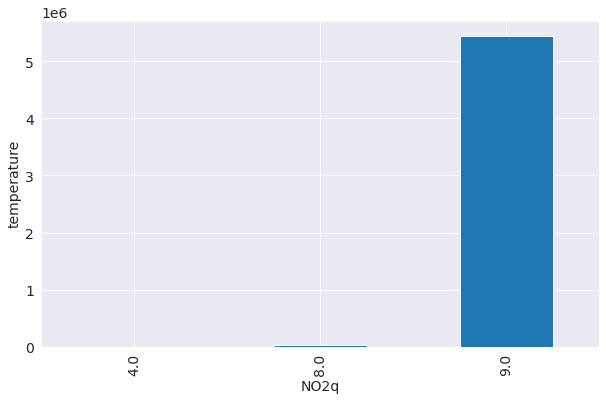

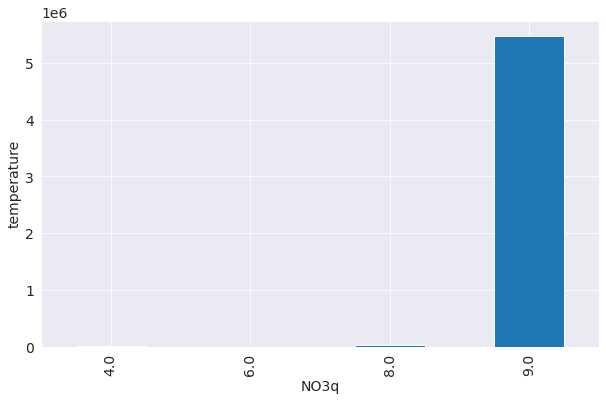

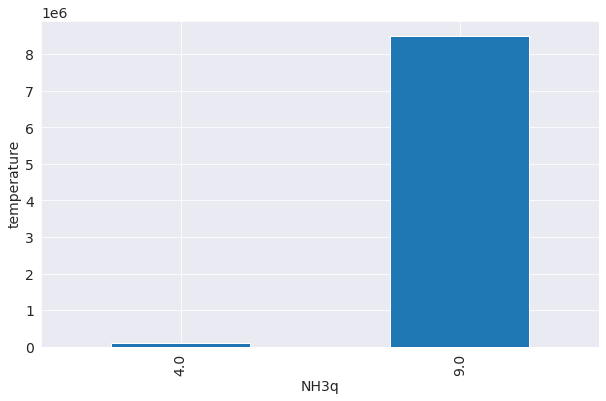

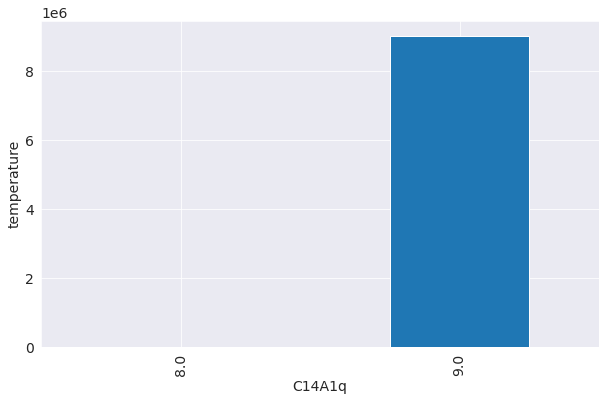

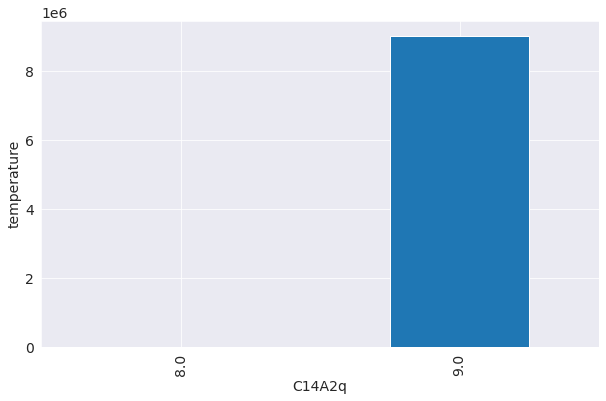

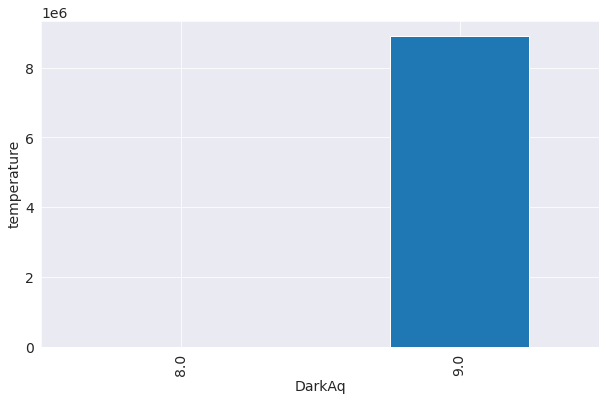

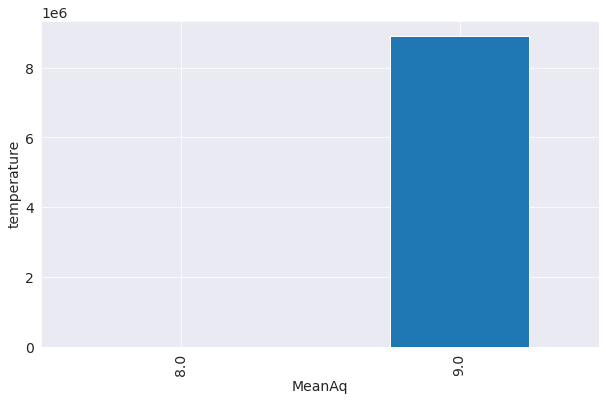

In [154]:
for feature in discrete_feature:
  data=bottle.copy()
  data.groupby(feature)["T_degC"].sum().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('temperature')
  plt.show()

In [155]:
# 2-Continous variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


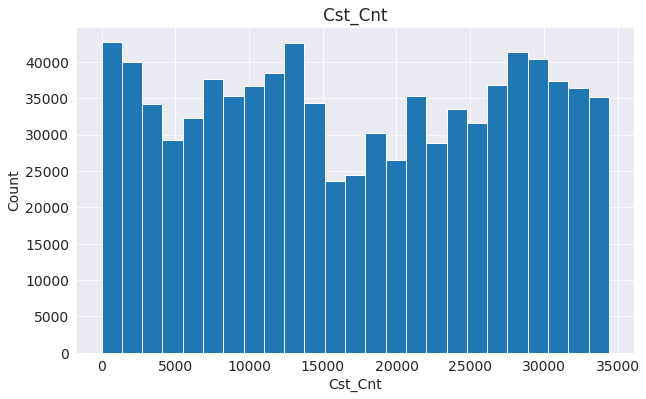

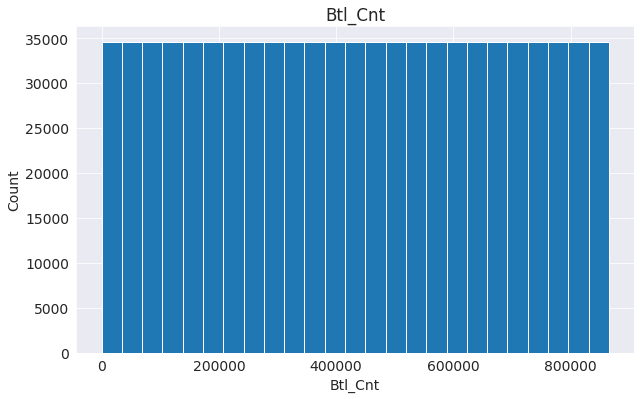

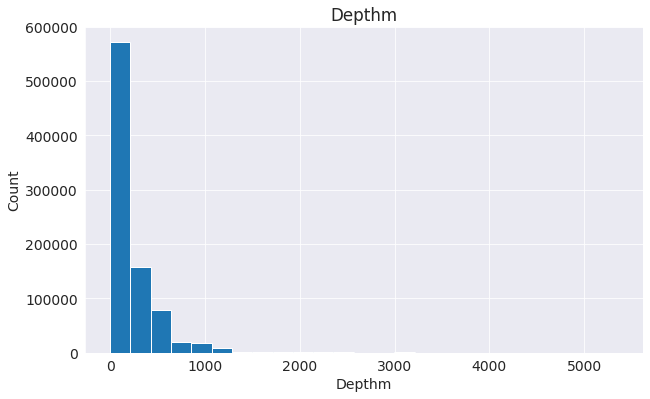

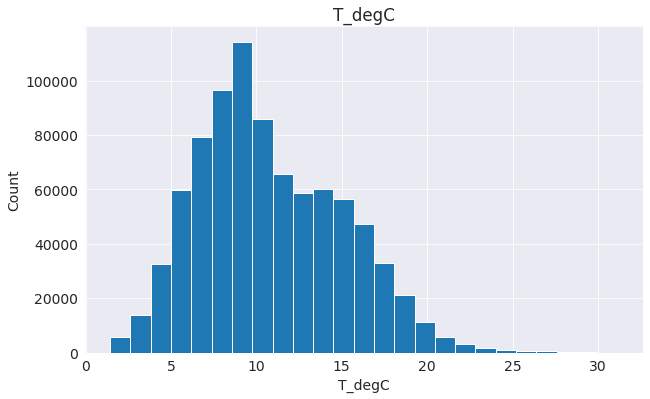

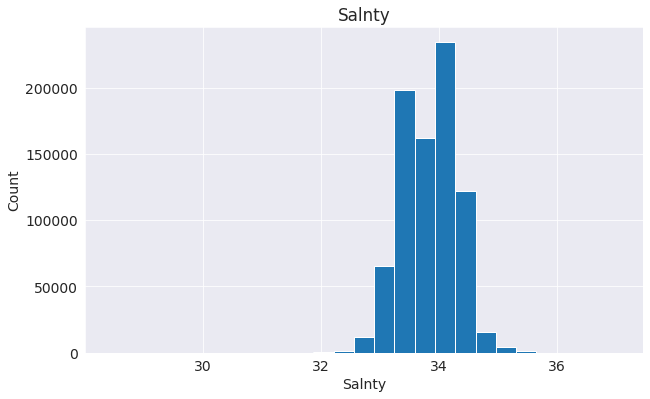

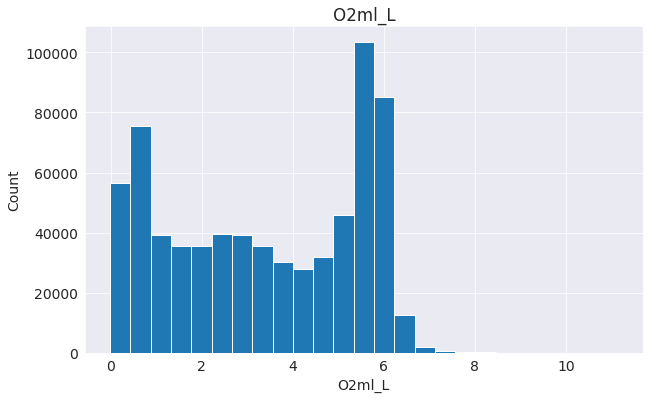

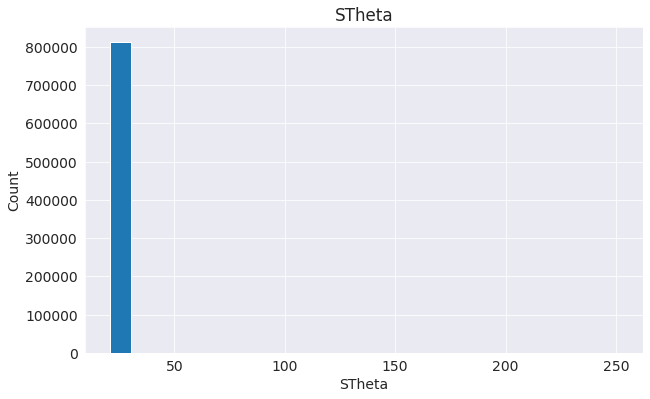

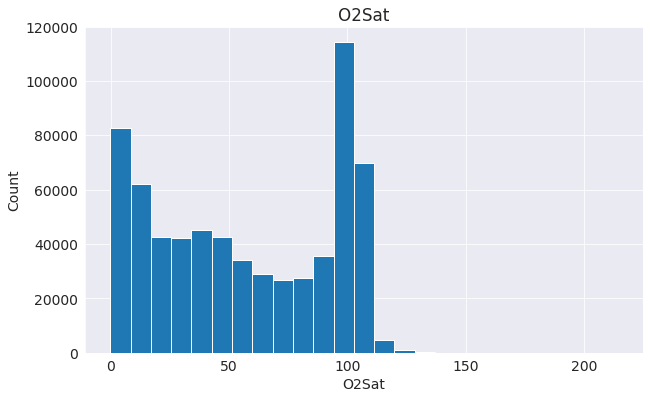

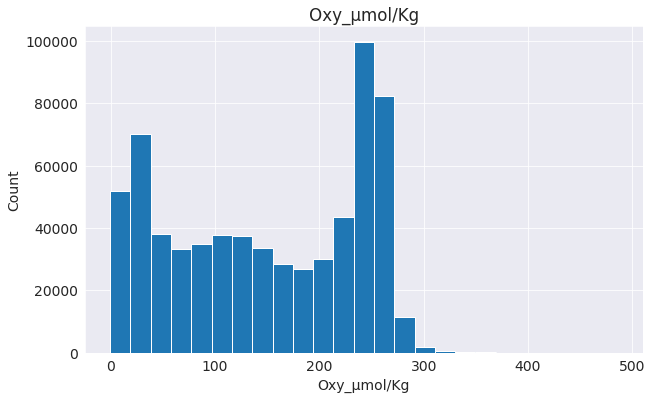

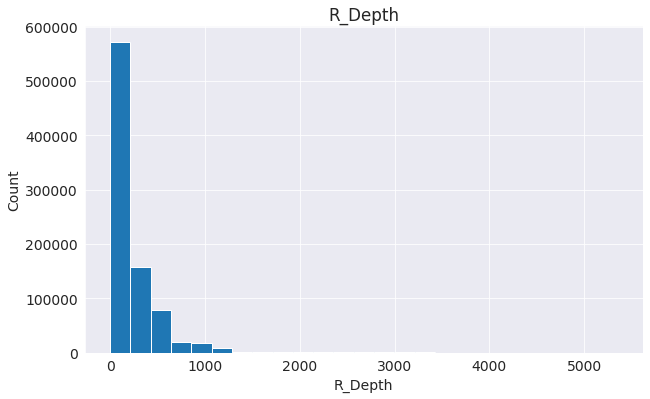

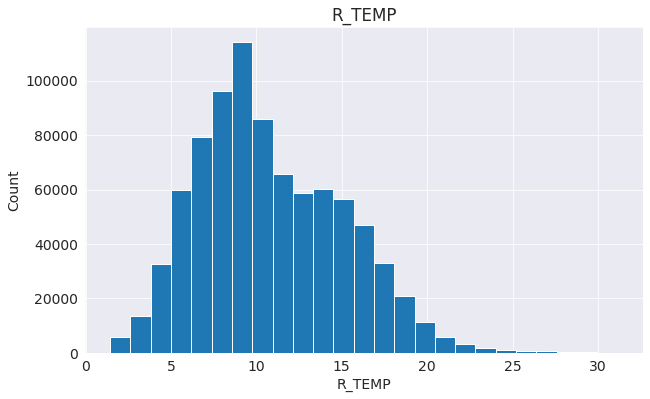

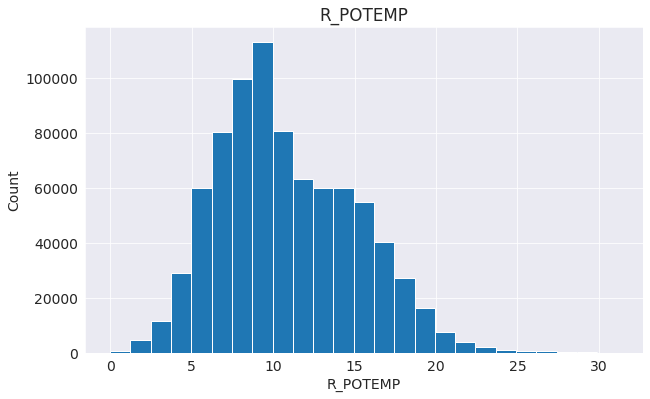

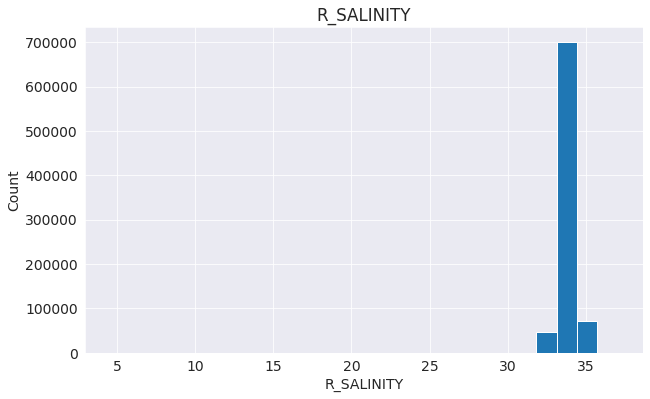

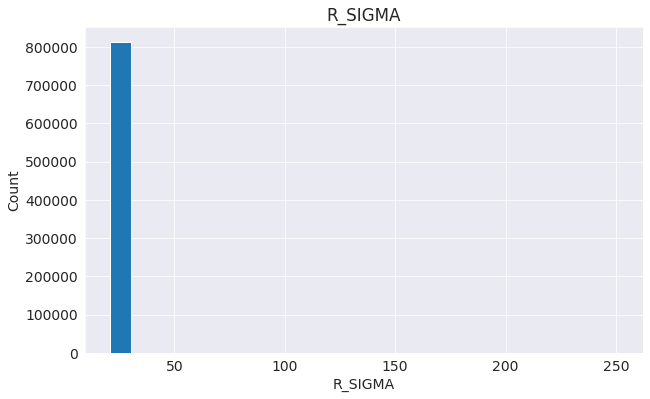

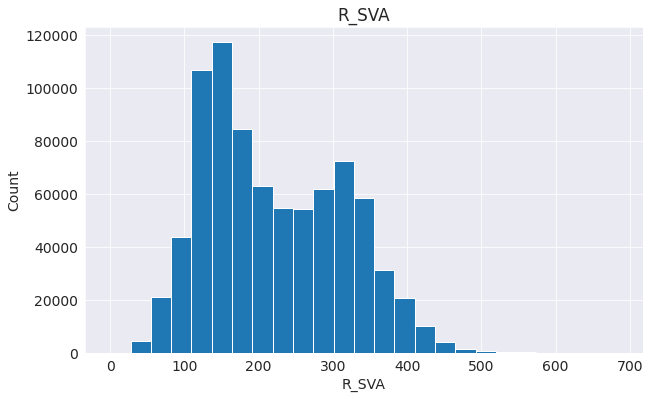

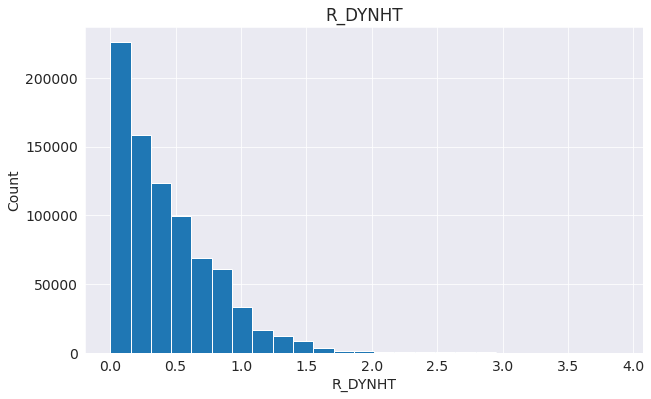

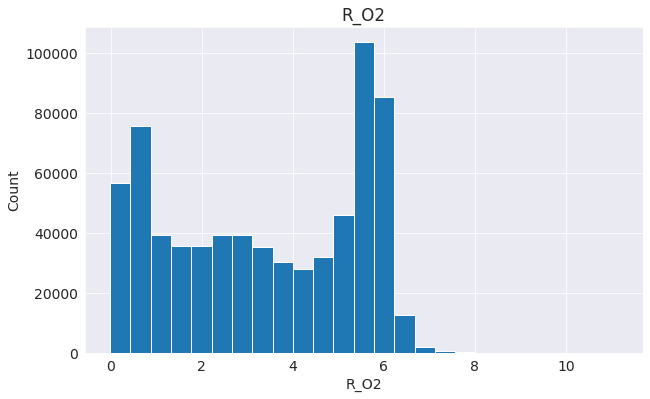

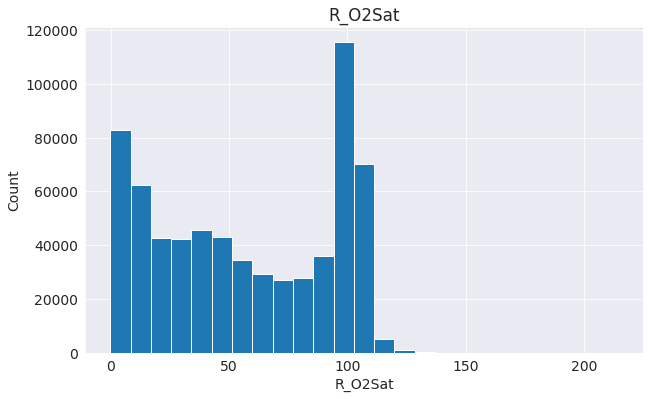

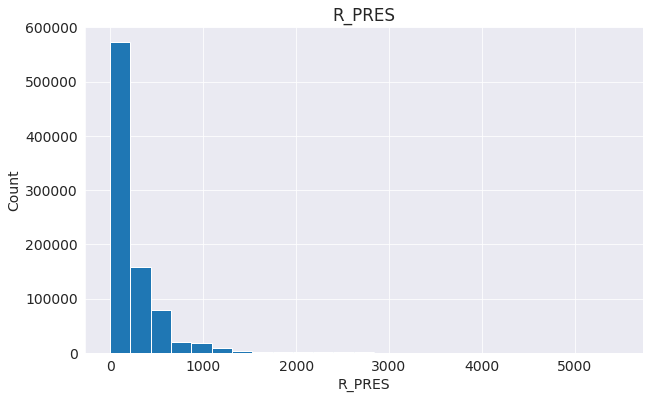

In [156]:
for feature in continuous_feature:
    data=bottle.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#Step 2 - Prepare the Dataset for Training

> Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the `input` and `target` column(s) for training the model.
2. Identify `numeric` and `categorical` input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


##Identify Inputs and Targets


> **QUESTION 3**: Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [157]:
# Identify the input columns (a list of column names)
input_cols=bottle.drop(["T_degC"],axis=1).columns
target_cols=bottle.drop(input_cols,axis=1).columns
target_cols

Index(['T_degC'], dtype='object')

Now that we've identified the input and target columns, we can separate input & target data.

In [158]:
inputs_df = bottle[input_cols].copy()
targets_df = bottle[target_cols].copy()

In [159]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Depthm       864863 non-null  int64  
 3   T_degC       853900 non-null  float64
 4   Salnty       817509 non-null  float64
 5   O2ml_L       696201 non-null  float64
 6   STheta       812174 non-null  float64
 7   O2Sat        661274 non-null  float64
 8   Oxy_µmol/Kg  661268 non-null  float64
 9   RecInd       864863 non-null  int64  
 10  T_prec       853900 non-null  float64
 11  S_prec       817509 non-null  float64
 12  P_qual       673755 non-null  float64
 13  Chlqua       639166 non-null  float64
 14  Phaqua       639170 non-null  float64
 15  NO2q         529474 non-null  float64
 16  NO3q         529933 non-null  float64
 17  NH3q         808299 non-null  float64
 18  C14A1q       848605 non-

## Identify Numeric and Categorical Data

The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

In [160]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

##Impute Numerical Data
Some of the numeric columns in our dataset contain missing values (nan)

In [161]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

NO2q           335389
NO3q           334930
Chlqua         225697
Phaqua         225693
Oxy_µmol/Kg    203595
O2Sat          203589
R_O2Sat        198415
P_qual         191108
O2ml_L         168662
R_O2           168662
NH3q            56564
R_SIGMA         52856
R_SVA           52771
STheta          52689
Salnty          47354
S_prec          47354
R_SALINITY      47354
R_DYNHT         46657
R_POTEMP        46047
MeanAq          24424
DarkAq          24423
C14A1q          16258
C14A2q          16240
T_prec          10963
R_TEMP          10963
dtype: int64

Machine learning models can't work with missing data. The process of filling missing values is called [imputation](https://scikit-learn.org/stable/modules/impute.html).

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.


> **QUESTION 4**: Impute (fill) missing values in the numeric columns of `inputs_df` using a `SimpleImputer`. 
>
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C88).

In [162]:
from sklearn.impute import SimpleImputer
#create,fit and transform data in imputer
imputer=SimpleImputer(strategy = 'mean')
imputer.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols]=imputer.transform(inputs_df[numeric_cols])

In [163]:
targets_df=targets_df.fillna(targets_df.median())

In [170]:
missing_counts = targets_df.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

After imputation, none of the numeric columns should contain any missing values

In [164]:
missing_counts = inputs_df.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

##Scale Numerical Values
The numeric columns in our dataset have varying ranges.
A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


> **QUESTION 6**: Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.
>


In [165]:
from sklearn.preprocessing import MinMaxScaler
# create,fit and transform to the numeric columns
scaler=MinMaxScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols]=scaler.transform(inputs_df[numeric_cols])

After scaling, the ranges of all numeric columns should be $(0, 1)$.

In [166]:
inputs_df.describe().loc[['min', 'max']]

,Cst_Cnt,Btl_Cnt,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [171]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df,targets_df,test_size=0.25,random_state=42)

In [172]:
train_inputs

,Cst_Cnt,Btl_Cnt,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
724600,0.849025,0.837822,0.008410,0.590608,0.525135,0.018308,0.461251,0.524241,0.0,0.500000,1.0,0.999999,0.000000,0.000000,0.999092,0.998624,1.0,1.0,1.0,1.0,1.0,0.008410,0.406061,0.433205,0.891511,0.018299,0.413031,0.038660,0.525135,0.461251,0.008245
220863,0.245037,0.255374,0.001869,0.566314,0.534111,0.016550,0.479458,0.533412,1.0,0.500000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.001869,0.445118,0.470777,0.885073,0.016515,0.467936,0.007732,0.534111,0.479458,0.001832
309020,0.342063,0.357306,0.013082,0.585726,0.498205,0.016198,0.456583,0.497592,0.0,0.500000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.013082,0.477778,0.501606,0.890217,0.016167,0.481991,0.111279,0.498205,0.456583,0.013008
357612,0.390228,0.413490,0.028032,0.609206,0.369838,0.022075,0.297852,0.368898,1.0,0.500000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.028032,0.270034,0.303147,0.896439,0.022040,0.295315,0.110825,0.369838,0.297852,0.027666
468985,0.541319,0.542266,0.028967,0.666395,0.134650,0.022171,0.113445,0.134304,0.0,0.500000,1.0,1.000000,1.000000,1.000000,0.999092,0.998624,1.0,1.0,1.0,1.0,1.0,0.028967,0.340067,0.369942,0.911594,0.022171,0.293265,0.113402,0.134650,0.113445,0.028582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.289626,0.299676,0.074752,0.672091,0.098743,0.025182,0.076097,0.098424,1.0,0.500000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.074752,0.207071,0.242453,0.913104,0.025173,0.201757,0.206186,0.098743,0.076097,0.073653
365838,0.396797,0.423002,0.005233,0.598977,0.590664,0.018695,0.516807,0.589608,0.0,0.500000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.005233,0.400337,0.428067,0.893728,0.018690,0.399854,0.020619,0.590664,0.516807,0.005130
131932,0.139348,0.152547,0.009344,0.594676,0.398564,0.018764,0.346872,0.397844,1.0,0.500000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.009344,0.392929,0.420681,0.892589,0.018734,0.398536,0.043814,0.398564,0.346872,0.009161
671155,0.796791,0.776026,0.011213,0.559340,0.446140,0.018373,0.381886,0.445374,0.0,0.500000,1.0,0.999999,0.999848,0.999844,0.999092,0.998624,1.0,1.0,1.0,1.0,1.0,0.011213,0.368013,0.396917,0.883224,0.018342,0.411420,0.048969,0.446140,0.381886,0.010993


In [173]:
train_targets

,T_degC
724600,13.50
220863,14.66
309020,15.63
357612,9.46
468985,11.54
...,...
259178,7.59
365838,13.33
131932,13.11
671155,12.37


## Step 3 - Train a Linear Regression Model

We're now ready to train the model. Linear regression is a commonly used technique for solving [regression problems](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C6). In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">

However, linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s). This is because it tries to fit the training data perfectly. 

Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better. Learn more about ridge regression here: https://www.youtube.com/watch?v=Q81RR3yKn30

In [175]:
from sklearn.linear_model import Ridge
# Create the model
model = Ridge(alpha=2)
# Fit the model using inputs and targets
model.fit(train_inputs,train_targets)

Ridge(alpha=2)

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

# Step 4 - Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

In [176]:
train_preds =model.predict(train_inputs)

In [185]:
from sklearn.metrics import mean_squared_error,r2_score
# Mean_Square_error
train_rmse = mean_squared_error(train_targets,train_preds,squared=False)
print('The RMSE loss for the training set is  {}.'.format(train_rmse))
# R2_score
train_r2 = r2_score(train_targets,train_preds)*100
print('The r2_score for the training set is  {} %.'.format(train_r2))



The RMSE loss for the training set is  0.0802779482111095.
The r2_score for the training set is  99.96377740775695 %.


In [186]:
val_preds =model.predict(val_inputs) val_targets

In [188]:
# Mean_Square_error
train_rmse = mean_squared_error(val_targets,val_preds,squared=False)
print('The RMSE loss for the validation set is  {}.'.format(train_rmse))
# R2_score
train_r2 = r2_score(val_targets,val_preds)*100
print('The r2_score for the Validation set is  {} %.'.format(train_r2))


The RMSE loss for the validation set is  0.0815990858964898.
The r2_score for the Validation set is  99.96255039554882 %.


## Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

In [193]:
weights=model.coef_.flatten()

Let's create a dataframe to view the weight assigned to each column.

In [194]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [195]:
weights_df

,columns,weight
22,R_TEMP,29.887357
7,Oxy_µmol/Kg,0.512088
6,O2Sat,0.269050
2,Depthm,0.166789
21,R_Depth,0.166589
1,Btl_Cnt,0.072200
5,STheta,0.033580
3,Salnty,0.012442
27,R_DYNHT,0.005045
10,S_prec,0.004339


##Making Predictions
The model can be used to make predictions on new inputs using the following helper function:

In [196]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    return model.predict(X_input)[0]

In [ ]:
#predicted_Temperature = predict_input(sample_input)

##Saving the model
Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [197]:
import joblib

In [200]:
Temperature_predictor = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_cols': target_cols,
    'numeric_cols': numeric_cols,
}

In [201]:
joblib.dump(Temperature_predictor, 'Temperature_predictor.joblib')

['Temperature_predictor.joblib']

#Putting it all Together